In [0]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
#!wget https://pns2019.github.io/images/Lenna.png

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-e4tihjpf
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-e4tihjpf
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=202905f89dd36d330aea3cf3ea6dd14b1a793a3c2fc6f1ed0f23a4065b69323b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8frebdem/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [0]:
!pip install pillow
!pip install tesseract
!pip install pytesseract

     |████████████████████████████████| 45.6MB 87kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=4b06f0c2090aad82c965864048144fd32c95250f5126cf902c5712e588dc0e11
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
  Created wheel for pytesseract: filename=pytesseract-0.3.3-py2.py3-none-any.whl size=13396 sha256=253d8dc13d2ea5d989eab9ae4cda034bd97dcdccc4cb88cef4cae02af743514d
  Stored in directory: /root/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241
Successfully built pytesseract


In [0]:
!pip install image

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,782 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
import cv2
print(cv2.__version__)

4.1.2


Photo ID Proof


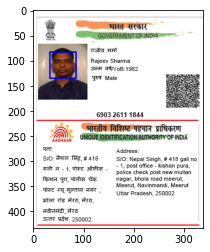

In [0]:
##First Phase of detection to check if it a valid photo ID proof or not

import cv2
from pnslib import utils
import matplotlib.pyplot as plt

# read image
img = cv2.imread("/content/Aadhar/test3.jpg")

# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

# search face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
count=0
for face in faces:
  count=count+1
if count:
  print("Photo ID Proof")
else:
  print("Not Photo ID or Face not clear...Retry with a clearer scan")
  
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()

In [0]:
import pytesseract
import shutil
import os
import random
import cv2
try:
 from PIL import Image
except ImportError:
 import Image


image_path_in_colab="/content/Aadhar/test3.jpg"
img=Image.open(image_path_in_colab)
text = pytesseract.image_to_string(img, lang="eng")

print(text)

aia eat

"Rajeev Sharma
SEH aH 0B:1982

PT Male

  

6903 2611 1844

» Ge RRE TEE TiRECT

 

  

UNIQUE IDENTIFICATION AUTHORITY OF INDIA
ae Address:
SIO: Aor Fag, #418 ‘S/O: Nepal Singh, # 418 gali no

sige. 1, Post office -kishan pura,

wet ~ police check post new mutan

farerer gr, state Gap nagar, bhola road meerut,
Meerut, Navinmandi, Meerut

SIE FLATT FAT, Uttar Pradesh, 250002

star te Ate, a,

waters, AS

Beem wee 250002


In [0]:
print(text)

aia eat

"Rajeev Sharma
SEH aH 0B:1982

PT Male

  

6903 2611 1844

» Ge RRE TEE TiRECT

 

  

UNIQUE IDENTIFICATION AUTHORITY OF INDIA
ae Address:
SIO: Aor Fag, #418 ‘S/O: Nepal Singh, # 418 gali no

sige. 1, Post office -kishan pura,

wet ~ police check post new mutan

farerer gr, state Gap nagar, bhola road meerut,
Meerut, Navinmandi, Meerut

SIE FLATT FAT, Uttar Pradesh, 250002

star te Ate, a,

waters, AS

Beem wee 250002


In [0]:
# function to check if small string is 
# there in big string 

def check_name(string,sub_string):
    if (string.find(sub_string)==-1):
        return 0
    else:
        return 1
    return

string = text
names =["Name","Name:","NAME","NAME:","name","Name :","NaMe","NAME :","nAmE"]
gender=["Male","MALE","male","FEMALE","Female","female","Others","Other","OTHERS","others"]
dobs=["Date Of Birth","DOB","yob","YOB","YoB","yob:","YOB:","YoB:","dob","date of birth","dateofbirth","DateofBirth","dateOfbirth","Year of Birth","year of birth","year of birth:","Year of Birth:","Birthday","birthday","BIRTHDAY","DateOfBirth","DateOfBirth:","Date Of Birth:","DOB:","dob:","date of birth:","dateofbirth:","DateofBirth:","dateOfbirth:","Birthday:","birthday:","BIRTHDAY:"]
adds=["Address","address","Permanent Address","permanent adddress","PermanentAddress","Permanent address","Permanentaddress","adress","Parmanent adress","Address:","address:","Permanent Address:","permanent adddress:","PermanentAddress:","Permanent address:","Permanentaddress:","adress:","Parmanent adress:"]
adhar=["UNIQUE IDENTIFICATION AUTHORITY OF INDIA","UNIQUE IDENTIFICATION AUTHORITY","UNIQUE IDENTIFICATION","AUTHORITY OF INDIA","IDENTIFICATION AUTHORITY","UNIQUE","IDENTIFICATION"]
pan=["INCOME TAX DEPARTMENT","INCOME TAX","INCOME","TAX DEPARTMENT","TAX","Permanent Account Number Card","Permanent Account","Account Number Card","Permanent Account Number","Permanen Acc","Permanent Number Card"]
for sub_str in names:
    #print(sub_str)
    name=check_name(string, sub_str) 
    if name:
        break
for sub in dobs:
    #print(sub)
    dob=check_name(string, sub)
    if dob:
        break
for subs in adds:
    #print(subs)
    address=check_name(string, subs) 
    if address:
        break

for gen in gender:
    #print(subs)
    gender=check_name(string, gen) 
    if gender:
        break  
for aad in adhar:
    #print(subs)
    adhar=check_name(string, aad) 
    if adhar:
        print("ADHAR CARD DETECTED")
        break 
for pn in pan:
    #print(subs)
    pan=check_name(string, pn) 
    if pan:
        print("PAN CARD DETECTED")
        break                       

print(name,dob,gender,address)

ADHAR CARD
0 0 1 1
